In [1]:
import requests 
import os
import zipfile

import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

In [2]:
train_URL = "https://storage.googleapis.com/ibeans/train.zip"
validation_URL = "https://storage.googleapis.com/ibeans/validation.zip"
test_URL = "https://storage.googleapis.com/ibeans/test.zip"

data_folder = "datasets/" 

In [3]:
def download_data(url_to_zip, destination_folder = data_folder):
  # Downloading the file by sending the request to the URL
  req = requests.get(url_to_zip)
  # Splitting URL to get the file name
  filename = url_to_zip.split('/')[-1]
  
  # Check if 'destination_folder' exists 
  if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)  # create a new directory of doesn't exist

  # Writing file to 'destination_folder'
  with open(destination_folder + filename,'wb') as output_file:
    output_file.write(req.content)

  # Extracting files from zip
  zip_ = zipfile.ZipFile(destination_folder + filename)
  zip_.extractall(destination_folder)
  zip_.close()

In [4]:
for dataset in [train_URL, validation_URL, test_URL]:
  download_data(dataset)
  print('Download and extraction finished for ', dataset)

Download and extraction finished for  https://storage.googleapis.com/ibeans/train.zip
Download and extraction finished for  https://storage.googleapis.com/ibeans/validation.zip
Download and extraction finished for  https://storage.googleapis.com/ibeans/test.zip


In [5]:
training_folder, testing_folder, validation_folder = "train/", "test/", "validation/",

In [6]:
def show_sample_images(folder, class_):
    # Build a connection string
    full_path = folder + class_ + "/"
    # Get a set of random images
    images = random.sample(os.listdir(full_path), 4)
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        img = mpimg.imread(full_path + img)
        ax = plt.subplot(2, 2,  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape, class_))
        plt.axis("off")

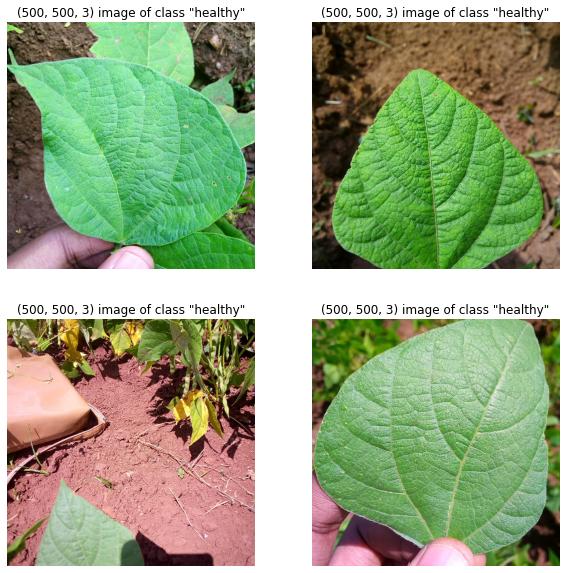

In [7]:
show_sample_images(data_folder + training_folder, "healthy")

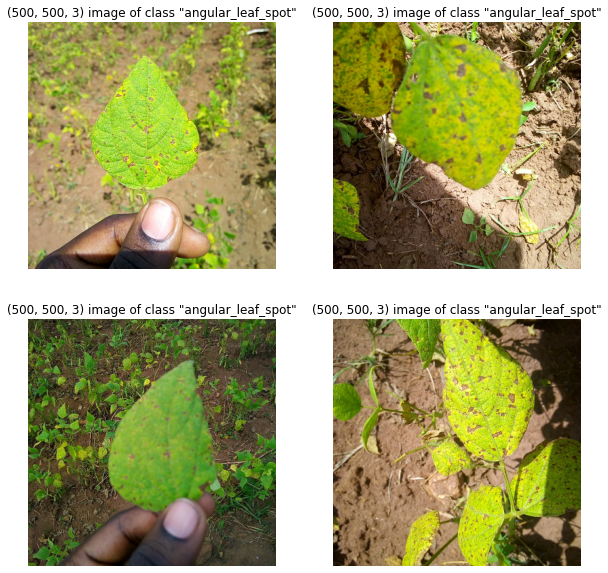

In [8]:
show_sample_images(data_folder + training_folder, "angular_leaf_spot")

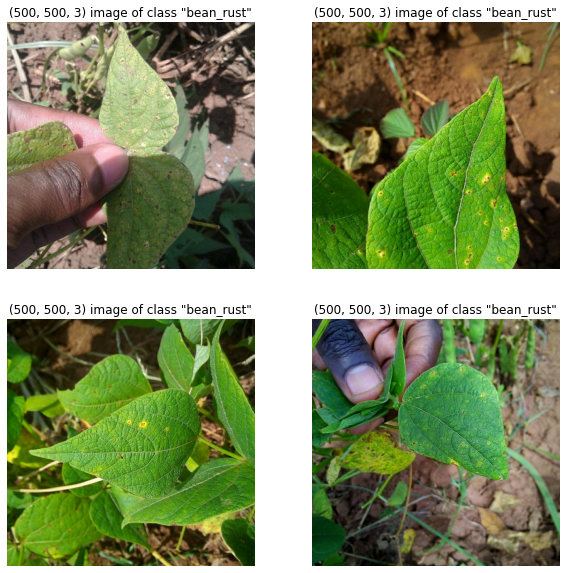

In [9]:
show_sample_images(data_folder + training_folder, "bean_rust")

The function image_data_format() returns the default image data format convention in Keras. The string "'channels_last'" means (H, W, C), whereas "'channels_first'" means (C, H, W). We can see that input images fit in the convention.

In [10]:
tf.keras.backend.image_data_format()

'channels_last'

In [11]:
# Inspecting classes balance:
classes = ["healthy", "angular_leaf_spot", "bean_rust"]

for split in [training_folder, testing_folder, validation_folder]:
  print(split)
  for c in classes:
    n_train_c = len(os.listdir(data_folder + split + f"/{c}"))
    print(f"Nº of instances of class '{c}': {n_train_c}")

train/
Nº of instances of class 'healthy': 342
Nº of instances of class 'angular_leaf_spot': 345
Nº of instances of class 'bean_rust': 348
test/
Nº of instances of class 'healthy': 42
Nº of instances of class 'angular_leaf_spot': 43
Nº of instances of class 'bean_rust': 43
validation/
Nº of instances of class 'healthy': 44
Nº of instances of class 'angular_leaf_spot': 44
Nº of instances of class 'bean_rust': 45
